<a href="https://colab.research.google.com/github/Humaid29/HUMAID/blob/main/Humaid_klasifikasi_citra_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"humaidz","key":"c91ae632205b9b2ef9e59dd12b479595"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
os.chdir('drive/MyDrive/Kaggle/Mata')

In [ ]:
!kaggle datasets download -d pavelbiz/eyes-rtte

 92% 37.0M/40.4M [00:00<00:00, 142MB/s] 
100% 40.4M/40.4M [00:00<00:00, 131MB/s]


In [ ]:
os.listdir()

['eyes-rtte.zip']

In [ ]:
import os
zip_path = 'content/drive/MyDrive/Kaggle/Mata/eyes-rtte.zip'

os.getcwd()

!cp '{zip_path}'
!unzip -q 'eyes-rtte.zip'

os.listdir()

cp: missing destination file operand after 'content/drive/MyDrive/Kaggle/Mata/eyes-rtte.zip'
Try 'cp --help' for more information.


['eyes-rtte.zip', 'femaleeyes', 'maleeyes']

In [ ]:
path_dir = '/content/drive/MyDrive/Kaggle/Mata/'

In [ ]:
!pip install split_folders tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

splitfolders.ratio(path_dir,
                   output= './train_val_split',
                   ratio=(0.8,0.2),
                   group_prefix=None
                   )

Copying files: 11525 files [02:53, 66.50 files/s]


In [ ]:
data_train = './train_val_split/train'
data_val = './train_val_split/val'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2,
    horizontal_flip=True,
    fill_mode = 'wrap')

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    class_mode='binary'
)

val_generator = valid_datagen.flow_from_directory(
    data_val,
    class_mode='binary'
)

Found 9219 images belonging to 2 classes.
Found 2306 images belonging to 2 classes.


In [ ]:
import keras
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),

                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
               optimizer=tf.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=15,
    validation_data=val_generator,
    validation_steps=5,
    verbose=2)

Epoch 1/15
30/30 - 162s - loss: 0.9038 - accuracy: 0.5479 - val_loss: 0.7153 - val_accuracy: 0.4500 - 162s/epoch - 5s/step
Epoch 2/15
30/30 - 155s - loss: 0.6915 - accuracy: 0.5406 - val_loss: 0.6829 - val_accuracy: 0.6125 - 155s/epoch - 5s/step
Epoch 3/15
30/30 - 154s - loss: 0.6874 - accuracy: 0.5354 - val_loss: 0.6843 - val_accuracy: 0.5750 - 154s/epoch - 5s/step
Epoch 4/15
30/30 - 150s - loss: 0.6495 - accuracy: 0.6208 - val_loss: 0.5882 - val_accuracy: 0.7000 - 150s/epoch - 5s/step
Epoch 5/15
30/30 - 152s - loss: 0.5726 - accuracy: 0.6992 - val_loss: 0.7798 - val_accuracy: 0.6562 - 152s/epoch - 5s/step
Epoch 6/15
30/30 - 155s - loss: 0.5574 - accuracy: 0.7333 - val_loss: 0.3917 - val_accuracy: 0.8500 - 155s/epoch - 5s/step
Epoch 7/15
30/30 - 154s - loss: 0.5240 - accuracy: 0.7479 - val_loss: 0.5660 - val_accuracy: 0.6750 - 154s/epoch - 5s/step
Epoch 8/15
30/30 - 156s - loss: 0.4566 - accuracy: 0.7927 - val_loss: 0.4601 - val_accuracy: 0.8500 - 156s/epoch - 5s/step
Epoch 9/15
30/30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


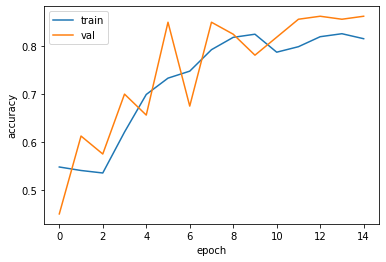

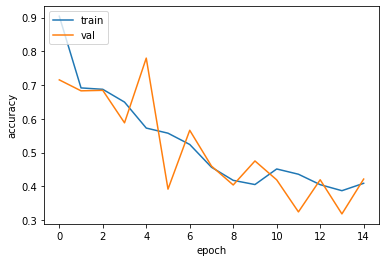

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title=('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title=('model_loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pred = model.predict(val_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)

print('confusion matrix')
print(confusion_matrix(y_true, y_pred))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from keras.models import Sequential, model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

  model.save_weights("model.h5")
  print("Save model to disk")

Save model to disk


In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(val_generator, verbose=2)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

73/73 - 92s - loss: 0.3603 - accuracy: 0.8478 - 92s/epoch - 1s/step
accuracy: 84.78%
